# Numerical experiment 1

In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
from matplotlib import gridspec
os.chdir('../')
from src.dynamical_system.model import lorenz96, lorenz96_Jacobian
from src.dynamical_system.simulate import simulate_rk4
from src.dynamical_system.lyapunov_exponent import shimada_nagashima_algorithm, fractal_dim_from_lyapunov
from src.intrinsic_dimension_estimation import Maximum_Likelihood_Estimation_of_ID as MLE_ID

In [2]:
rcParams_dict = {
    'font.family':'Times New Roman',
    'mathtext.fontset':'stix',
    'font.size':15,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'axes.linewidth':1.5,
    'xtick.major.size':8,
    'ytick.major.size':8,}

for key in rcParams_dict.keys():plt.rcParams[str(key)] = rcParams_dict[str(key)]

In [3]:
rcParams_dict = {
    'font.family':'Times New Roman',
    'mathtext.fontset':'stix',
    'font.size':15,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'axes.linewidth':1.5,
    'xtick.major.size':8,
    'ytick.major.size':8,}
for key in rcParams_dict.keys():plt.rcParams[str(key)] = rcParams_dict[str(key)]

In [7]:
### DEFINE
SEED = 0
np.random.seed(seed=SEED)
F_LIST = [5.5, 7.0, 9.5, 17.0]
N = 10
X_INIT = np.random.random(N)
SIMULATION_SETTINGS={'start time':0.,
                     'ending time':1100.,
                     'time step size':0.01,}
N_UNIT_AFTER = 10000
N_STEP = 10
N_ESTIMATION = 10000
K_LIST = np.arange(15, 450, 10)

In [4]:
### Numerical experiments
fractal_dim_list = []
intrinsic_dim_list = []
for i, F in enumerate(F_LIST):
    print("Experiment"+str(i+1)+" (F = "+str(F)+") ")
    ### Simulate lorenz96
    X, T = simulate_rk4(lorenz96, X_INIT, F, SIMULATION_SETTINGS)
    X = X[N_UNIT_AFTER::N_STEP]
    T = T[N_UNIT_AFTER::N_STEP]
    ### Compute fractal-dimension
    lyapunov_exponent = shimada_nagashima_algorithm(lorenz96_Jacobian, X[:N_ESTIMATION], SIMULATION_SETTINGS['time step size']*N_STEP)
    fractal_dim = fractal_dim_from_lyapunov(lyapunov_exponent)
    print("   fractal-dimension:   "+str(fractal_dim))
    ### Estimate intrinsic-dimension
    estimator = MLE_ID()
    intrinsic_dim = estimator.fit(X[:N_ESTIMATION], K_LIST, standardization=False)
    print("   intrinsic-dimension: "+str(intrinsic_dim[-1]))
    ### Record
    fractal_dim_list.append(fractal_dim)
    intrinsic_dim_list.append(intrinsic_dim)
    print("-----------------------------------------")

Experiment1 (F = 5.5) 


   fractal-dimension:   4


   intrinsic-dimension: 3.971536602201809
-----------------------------------------
Experiment2 (F = 7.0) 


   fractal-dimension:   5


   intrinsic-dimension: 5.023163201047921
-----------------------------------------
Experiment3 (F = 9.5) 


   fractal-dimension:   6


   intrinsic-dimension: 5.932634798892141
-----------------------------------------
Experiment4 (F = 17.0) 


   fractal-dimension:   7


   intrinsic-dimension: 6.806042716881738
-----------------------------------------


In [10]:
def estimated_dimension_list(fractal_dim_list, intrinsic_dim_list, k_list, label_list, 
                             c=('b', 'r', 'g', 'm'), m=('o', 's', '^', 'v')):
    spec = gridspec.GridSpec(ncols=1, nrows=1)
    fig = plt.figure(figsize=(10, 3))
    ax = fig.add_subplot(spec[0])
    for i in range(len(fractal_dim_list)): ax.axhline(y=fractal_dim_list[i], linestyle='--', c='k')
    for i in range(len(fractal_dim_list)): ax.plot(k_list, intrinsic_dim_list[i], marker=m[i], c=c[i], ms=5, label=label_list[i])
    ax.set_xlabel(r'Number of Nearest Neighbor $k$')
    ax.set_ylabel(r'Estimated dimension $\hat{D}$')
    fig.legend(loc="upper center", facecolor="white", edgecolor="white", bbox_to_anchor=(0.5, 1.06), ncol=len(fractal_dim_list))
    plt.show()

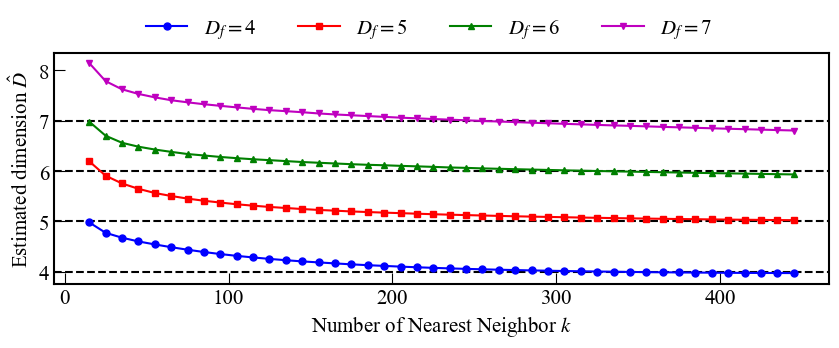

In [11]:
estimated_dimension_list(fractal_dim_list[:4], intrinsic_dim_list[:4], K_LIST, 
                         [r'$D_{f}=$'+str(fractal_dim_list[0]),
                          r'$D_{f}=$'+str(fractal_dim_list[1]),
                          r'$D_{f}=$'+str(fractal_dim_list[2]),
                          r'$D_{f}=$'+str(fractal_dim_list[3])],)